In [1]:
from gensim.models import KeyedVectors

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

In [4]:
stop_words = stopwords.words('english')

In [5]:
lem = WordNetLemmatizer()

In [6]:
df = pd.read_csv('/Users/aydin/Downloads/train.tsv',sep="\t")

In [7]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [9]:
def cleaning(text):
    text_tokens=word_tokenize(text.lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    return ' '.join(text_cleaned)

In [10]:
df['pharese_clean']=df.Phrase.apply(cleaning)

In [114]:
df.pharese_clean[0]

'series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [11]:
X_train = df['pharese_clean']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer()

In [14]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
X_train_count = vectorizer.transform(X_train)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tf_idf_vek = TfidfVectorizer()

In [18]:
tf_idf_vek.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
X_train__tf_idf = tf_idf_vek.transform(X_train)

In [20]:
b = pd.DataFrame(X_train__tf_idf.toarray(), columns=tf_idf_vek.get_feature_names())
b

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
a = pd.DataFrame(X_train_count.toarray(), columns=tf_idf_vek.get_feature_names())

In [22]:
a

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
liste = []
for i in list(a.index):
    top = a.loc[i].sum()
    liste.append(top)
print(liste[0])
print(len(liste))

15
156060


In [24]:
df['top_cv'] = liste 

In [25]:
df.top_cv.head()

0    15
1     6
2     1
3     0
4     1
Name: top_cv, dtype: int64

In [26]:
liste = []
for i in list(a.index):
    top = b.loc[i].sum()
    liste.append(top)
print(liste[0])
print(len(liste))

3.6495971782065784
156060


In [27]:
df['top_tpf'] = liste 

In [28]:

df.top_tpf.head()

0    3.649597
1    2.397201
2    1.000000
3    0.000000
4    1.000000
Name: top_tpf, dtype: float64

In [29]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,pharese_clean,top_cv,top_tpf
0,1,1,A series of escapades demonstrating the adage ...,1,series escapade demonstrating adage good goose...,15,3.649597
1,2,1,A series of escapades demonstrating the adage ...,2,series escapade demonstrating adage good goose,6,2.397201
2,3,1,A series,2,series,1,1.000000
3,4,1,A,2,,0,0.000000
4,5,1,series,2,series,1,1.000000


In [30]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [31]:
df_bi = df[df['Sentiment'] != 2]

In [32]:
df_bi['sent_bi']=df_bi.Sentiment.apply(lambda x: 0 if x < 2 else 1)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_bi

,PhraseId,SentenceId,Phrase,Sentiment,pharese_clean,top_cv,top_tpf,sent_bi
0,1,1,A series of escapades demonstrating the adage ...,1,series escapade demonstrating adage good goose...,15,3.649597,0
21,22,1,good for the goose,3,good goose,2,1.363803,1
22,23,1,good,3,good,1,1.000000,1
33,34,1,"the gander , some of which occasionally amuses...",1,gander occasionally amuses none amount much story,7,2.560311,0
46,47,1,amuses,3,amuses,1,1.000000,1
...,...,...,...,...,...,...,...,...
156047,156048,8544,quietly suggesting the sadness and obsession b...,1,quietly suggesting sadness obsession beneath h...,9,2.985655,0
156051,156052,8544,sadness and obsession,1,sadness obsession,2,1.414198,0
156052,156053,8544,sadness and,1,sadness,1,1.000000,0
156056,156057,8544,forced avuncular chortles,1,forced avuncular chortle,3,1.721695,0


In [34]:
df[['top_tpf','top_cv']].corr()

,top_tpf,top_cv
top_tpf,1.000000,0.959284
top_cv,0.959284,1.000000


In [35]:
df_bi.groupby('sent_bi').mean()

,PhraseId,SentenceId,Sentiment,top_cv,top_tpf
sent_bi,,,,,
0,80606.402242,4222.025710,0.794089,4.836803,2.002918
1,78768.771224,4118.689151,3.218499,4.644412,1.965783


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_bi[['top_tpf']]
y = df_bi['sent_bi']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [40]:
model = LogisticRegression()

In [41]:
model = model.fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[   0, 6785],
       [   0, 8511]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6785
           1       0.56      1.00      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.28      0.50      0.36     15296
weighted avg       0.31      0.56      0.40     15296



/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [50]:
error_rate = []

for i in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_s,y_train)
    y_pred_i = model.predict(X_test_s)
    error_rate.append(np.mean(y_pred_i != y_test))



Text(0, 0.5, 'Error Rate')

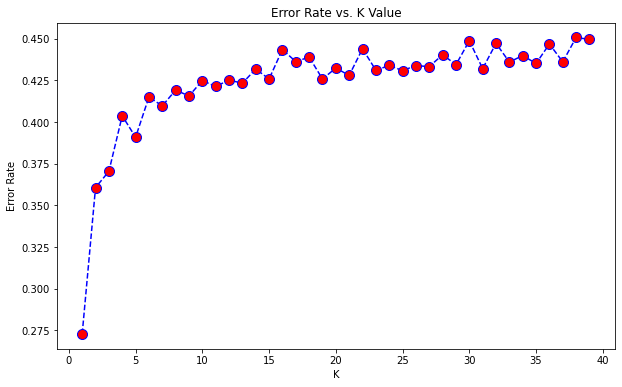

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.7271835774058577 at K = 0


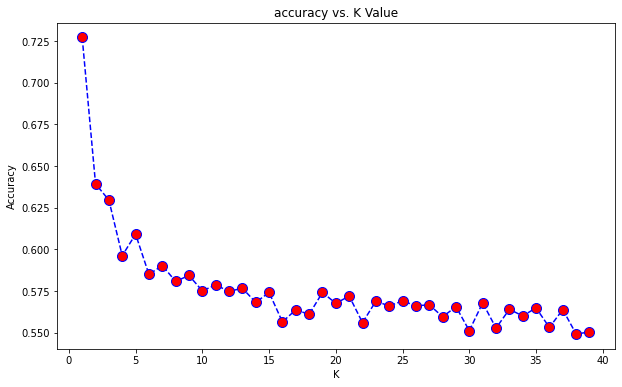

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [54]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_test_s)

print('WITH K=11')
print('\n')
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=11


[[4317 2468]
 [1705 6806]]


              precision    recall  f1-score   support

           0       0.72      0.64      0.67      6785
           1       0.73      0.80      0.77      8511

    accuracy                           0.73     15296
   macro avg       0.73      0.72      0.72     15296
weighted avg       0.73      0.73      0.72     15296



Maximum accuracy:- 0.7271835774058577 at K = 0


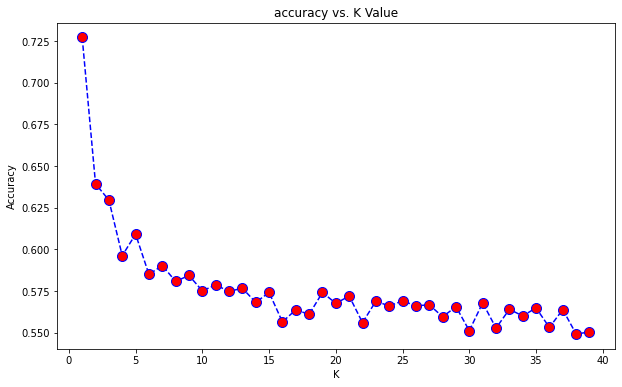

In [55]:
X = df_bi[['top_cv']]
y = df_bi['sent_bi']
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_test_s)

print('WITH K=1')
print('\n')
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[4317 2468]
 [1705 6806]]


              precision    recall  f1-score   support

           0       0.72      0.64      0.67      6785
           1       0.73      0.80      0.77      8511

    accuracy                           0.73     15296
   macro avg       0.73      0.72      0.72     15296
weighted avg       0.73      0.73      0.72     15296



In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [58]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [60]:
y_pred = dt_model.predict(X_test)

In [61]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4245 2540]
 [1721 6790]]


              precision    recall  f1-score   support

           0       0.71      0.63      0.67      6785
           1       0.73      0.80      0.76      8511

    accuracy                           0.72     15296
   macro avg       0.72      0.71      0.71     15296
weighted avg       0.72      0.72      0.72     15296



In [62]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [64]:
y_pred = rf_model.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4209 2576]
 [1666 6845]]


              precision    recall  f1-score   support

           0       0.72      0.62      0.66      6785
           1       0.73      0.80      0.76      8511

    accuracy                           0.72     15296
   macro avg       0.72      0.71      0.71     15296
weighted avg       0.72      0.72      0.72     15296



In [65]:
rf=RandomForestClassifier()

In [72]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [0,1],
              "min_samples_split": [2,4,6]}

In [73]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.4min finished


In [74]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 1, 'min_samples_split': 4, 'n_estimators': 50}

In [75]:
rf_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 1, 
                                  min_samples_split = 4, 
                                  n_estimators = 50).fit(X_train, y_train)

In [76]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 116, 6669],
       [  67, 8444]])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.02      0.03      6785
           1       0.56      0.99      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.60      0.50      0.37     15296
weighted avg       0.59      0.56      0.41     15296



In [78]:
from xgboost import XGBClassifier

In [79]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [80]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 298, 6487],
       [ 220, 8291]])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08      6785
           1       0.56      0.97      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.57      0.51      0.40     15296
weighted avg       0.57      0.56      0.43     15296



In [82]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[0,1],
             "learning_rate":[0.1,0.01,0.3]}

In [86]:
xgb = XGBClassifier()

In [87]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.5min finished


In [88]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 300, 'subsample': 1}

In [89]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 1, 
                                n_estimators= 300, 
                                subsample= 1).fit(X_train, y_train)

In [90]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   0, 6785],
       [   0, 8511]])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6785
           1       0.56      1.00      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.28      0.50      0.36     15296
weighted avg       0.31      0.56      0.40     15296



In [94]:
X = df_bi[['top_tpf']]
y = df_bi['sent_bi']

In [95]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [96]:
y_pred = dt_model.predict(X_test)

In [97]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4245 2540]
 [1721 6790]]


              precision    recall  f1-score   support

           0       0.71      0.63      0.67      6785
           1       0.73      0.80      0.76      8511

    accuracy                           0.72     15296
   macro avg       0.72      0.71      0.71     15296
weighted avg       0.72      0.72      0.72     15296



In [98]:
rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[4207 2578]
 [1663 6848]]


              precision    recall  f1-score   support

           0       0.72      0.62      0.66      6785
           1       0.73      0.80      0.76      8511

    accuracy                           0.72     15296
   macro avg       0.72      0.71      0.71     15296
weighted avg       0.72      0.72      0.72     15296



In [99]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 298, 6487],
       [ 220, 8291]])

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08      6785
           1       0.56      0.97      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.57      0.51      0.40     15296
weighted avg       0.57      0.56      0.43     15296



In [101]:
rf=RandomForestClassifier()

In [102]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 24.7min finished


In [104]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [105]:
rf_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 1, 
                                  min_samples_split = 2, 
                                  n_estimators = 100).fit(X_train, y_train)

In [106]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  92, 6693],
       [  49, 8462]])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.01      0.03      6785
           1       0.56      0.99      0.72      8511

    accuracy                           0.56     15296
   macro avg       0.61      0.50      0.37     15296
weighted avg       0.60      0.56      0.41     15296



In [108]:
xgb = XGBClassifier()

In [109]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[0,1],
             "learning_rate":[0.1,0.01,0.3]}

In [110]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.1min finished


In [111]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 300, 'subsample': 1}

In [112]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 1, 
                                n_estimators= 300, 
                                subsample= 1).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   3, 6782],
       [   1, 8510]])

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.00      0.00      6785
           1       0.56      1.00      0.72      8511

    accuracy                           0.56     15296
   macro avg       0.65      0.50      0.36     15296
weighted avg       0.64      0.56      0.40     15296



In [125]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

In [119]:
df_sec = df[['pharese_clean','Sentiment']]

In [122]:
df_sec = df_sec[df_sec['Sentiment'] != 2]

In [129]:
df_sec['sent_bi'] = df_sec.Sentiment.apply(lambda x : 'neg' if x < 2 else 'pov')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_sec

,pharese_clean,Sentiment,sent_bi
0,series escapade demonstrating adage good goose...,1,neg
21,good goose,3,pov
22,good,3,pov
33,gander occasionally amuses none amount much story,1,neg
46,amuses,3,pov
...,...,...,...
156047,quietly suggesting sadness obsession beneath h...,1,neg
156051,sadness obsession,1,neg
156052,sadness,1,neg
156056,forced avuncular chortle,1,neg


In [131]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_sec["pharese_clean"],
                                                                   df_sec["sent_bi"],
                                                                    random_state = 14)



In [126]:
encoder = preprocessing.LabelEncoder()

In [132]:
y_test = encoder.fit_transform(y_test)

In [133]:
y_train = encoder.fit_transform(y_train)

In [136]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [137]:
X_train_count = vectorizer.transform(X_train)

In [138]:
X_test_count = vectorizer.transform(X_test)

In [139]:
tdf_vec = TfidfVectorizer()

In [140]:
tdf_vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [141]:
X_train__tf_idf = tdf_vec.transform(X_train)

In [142]:
X_test__tf_idf = tdf_vec.transform(X_test)

In [143]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7064 1395]
 [1060 9601]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8459
           1       0.87      0.90      0.89     10661

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Count Vectors Accuracy: 0.8282426778242679


In [145]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train__tf_idf, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test__tf_idf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_count)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

TF-IDF Accuracy: 0.8212866108786612


In [146]:
from xgboost import XGBClassifier

In [147]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


[[ 1849  6610]
 [  329 10332]]
              precision    recall  f1-score   support

           0       0.85      0.22      0.35      8459
           1       0.61      0.97      0.75     10661

    accuracy                           0.64     19120
   macro avg       0.73      0.59      0.55     19120
weighted avg       0.72      0.64      0.57     19120



In [155]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7033 1426]
 [1063 9598]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8459
           1       0.87      0.90      0.89     10661

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [157]:
rf = RandomForestClassifier()
rf.fit(X_train__tf_idf , y_train)
# Make predictions
y_pred = rf.predict(X_test__tf_idf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7254 1205]
 [ 946 9715]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8459
           1       0.89      0.91      0.90     10661

    accuracy                           0.89     19120
   macro avg       0.89      0.88      0.89     19120
weighted avg       0.89      0.89      0.89     19120

